### 测试封装好的函数， 函数在utils文件夹下

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import os
from scipy.stats import pearsonr
from tqdm import tqdm
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from joblib import dump, load
import librosa.display  

from utils import data_process, visualize

In [2]:
#True  01227587577.csv  01231316389.csv
# EQ_Place/dataset/EQ_20210828_070322/01231316389.csv

In [2]:
path='/home/Amin/EQ_Place/dataset/EQ_20210828_070322/'
f='01227587577.csv'
df=pd.read_csv(path+f)
df=np.array(df)[:,:3]
ex,ey,ez=df[:,0],df[:,1],df[:,2]

In [ ]:
visualize.draw_picture([ex,ey,ez], show=True, save_path=None, save=False)

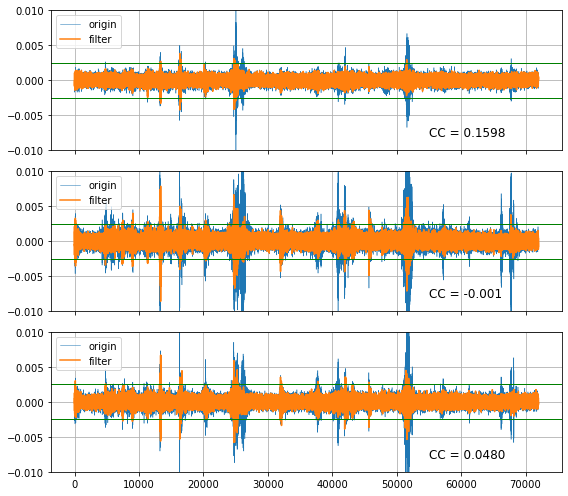

In [3]:
data=[ex,ey,ez]
filteData=[]
sos=signal.butter(N=3, Wn=35, btype='lowpass',fs=100,output='sos')
filteData.append(signal.sosfilt(sos, ex))
filteData.append(signal.sosfilt(sos, ey))
filteData.append(signal.sosfilt(sos, ez))
pccs=list(map(lambda x, y :pearsonr(x, y), data, filteData))
legend=['origin', 'filter']
x_lim=np.arange(0,len(ex),1)
yline=0.0025
lim=0.01
fig, axs= plt.subplots(3, 1, sharex=True,figsize=(8, 7))
for i in range(3):
    axs[i].plot(x_lim, data[i], linewidth=0.5)
    axs[i].plot(x_lim, filteData[i])
    axs[i].legend(legend, loc='upper left')
    axs[i].axhline(y=yline, c="green",  linewidth=1)
    axs[i].axhline(y=-yline, c="green",  linewidth=1)
    axs[i].text(55000,-0.008,  s='CC = '+str(pccs[i])[1:7],fontsize=12)
    axs[i].set_ylim((-lim, lim))
    axs[i].grid(True)

plt.tight_layout()

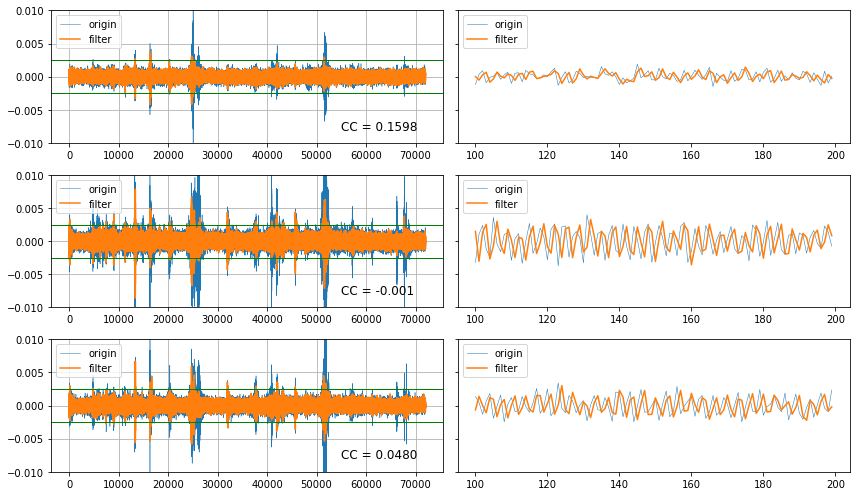

In [4]:
data=[ex,ey,ez]
filteData=[]
sos=signal.butter(N=3, Wn=35, btype='lowpass',fs=100,output='sos')
filteData.append(signal.sosfilt(sos, ex))
filteData.append(signal.sosfilt(sos, ey))
filteData.append(signal.sosfilt(sos, ez))
pccs=list(map(lambda x, y :pearsonr(x, y), data, filteData))
legend=['origin', 'filter']
x_lim=np.arange(0,len(ex),1)
yline=0.0025
lim=0.01
fig, axs = plt.subplots(3, 2, sharex=False,sharey=True,figsize=(12, 7))
for i in range(3):
    axs[i,0].plot(x_lim, data[i], linewidth=0.5)
    axs[i,0].plot(x_lim, filteData[i])
    axs[i,0].legend(legend, loc='upper left')
    axs[i,0].axhline(y=yline, c="green",  linewidth=1)
    axs[i,0].axhline(y=-yline, c="green",  linewidth=1)
    axs[i,0].text(55000,-0.008,  s='CC = '+str(pccs[i])[1:7],fontsize=12)
    axs[i,0].set_ylim((-lim, lim))
    
    axs[i,1].plot(x_lim[100:200], data[i][100:200], linewidth=0.5)
    axs[i,1].plot(x_lim[100:200], filteData[i][100:200])
    axs[i,1].legend(legend, loc='upper left')
    axs[i,1].set_ylim((-lim, lim))
    axs[i,0].grid(True)

plt.tight_layout()

0.676681603830323


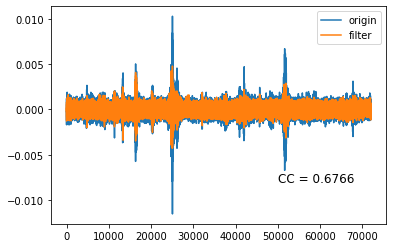

In [109]:
signal.butter(N=3, Wn=35, btype='lowpass',fs=100,output='sos')
filtedData = signal.sosfilt(sos, ex)

plt.plot(x_lim, ex)
plt.plot(x_lim, filtedData)
legend=[]
legend.append('origin')
legend.append('filter')  
plt.legend(legend)
pccs = pearsonr(ex, filtedData)
plt.text(50000,-0.008,  s='CC = '+str(pccs[0])[:6],fontsize=12 )
print(pccs[0])
plt.show()

0.676681603830323


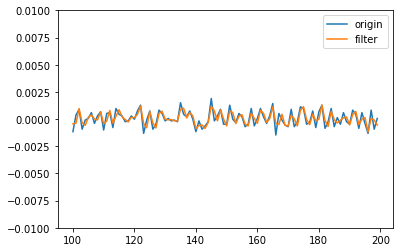

In [64]:
plt.plot(x_lim[100:200], ex[100:200])
plt.plot(x_lim[100:200], filtedData[100:200])
plt.ylim((-lim, lim))
legend=[]
legend.append('origin')
legend.append('filter')  
plt.legend(legend)
pccs = pearsonr(ex, filtedData)
print(pccs[0])
plt.show()